
##---------------------------##---------------------------##--------------------------------##----------------------------------------------##

## 机器学习建模（任务1～任务4）
以下任务基于虚拟的建模数据dataset.csv

建模数据集构成
* id：样本的编号
* dataset：划分了哪些数据用于train, 那些用于test
* label:  0或者1, 只有train数据才给出了label
* 其实字母f开头的列为建模特征

In [8]:
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel


### 任务1
对dataset中的建模数据进行分析，描述这个数据集的特点。

例如
* 样本量，特征量
* 建模特征缺失率的分布

 

In [9]:
### 1.1对数据信息进行分析 ###
model_data = pd.read_csv('model_data.csv')
# model_data.head()
model_data.isna().sum() #统计每个特征中NaN的数量
new_data = model_data.dropna(axis=1,how='all') #删除全为NaN的特征

new_data.info()
new_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3793 entries, 0 to 3792
Columns: 1845 entries, f_0021 to dataset
dtypes: float64(1842), int64(2), object(1)
memory usage: 53.4+ MB


,f_0021,f_0022,f_0023,f_0027,f_0028,f_0029,f_0034,f_0035,f_0036,f_0040,...,f_3241,f_3242,f_3243,f_3247,f_3248,f_3249,f_3266,label,id,dataset
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,train
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1,train
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2,train
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3,train
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4,train


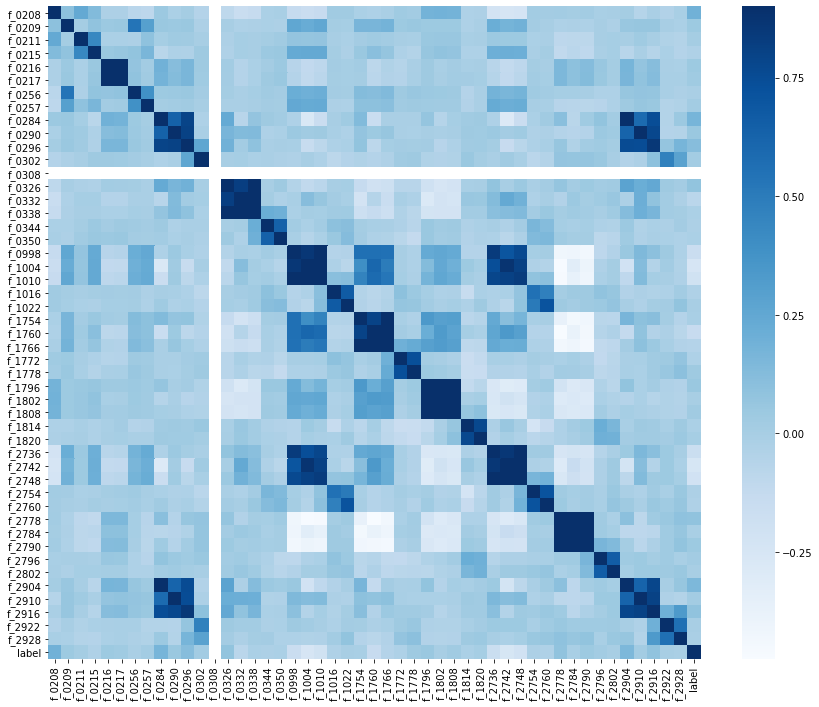

In [10]:
###1.2 对特征进行筛选 ###

train_data = new_data[new_data['dataset']== "train"]#由于test集中数据dataset为空,因此我只用训练集进行重新切分训练集和测试集
new_model_data = train_data #训练数据作为新模型数据
new_model_data
new_model_data1 = new_model_data.drop(['id','dataset'],axis=1)
# 各个特征缺失值比率
new_model_data1.isnull().sum()/len(new_model_data1)*100
# 按缺失值率小于20%的阈值筛选
a = new_model_data1.isnull().sum()/len(new_model_data1)*100 # 保存缺失值
variables = new_model_data1.columns
variable = []
for i in range(0,1843):
    if a[i]<=10:
        variable.append(variables[i])
variable
new_model_data1 = new_model_data1[variable] # 赛选出缺失值小于等于10的列，获得49个特征


# #可视化特征有效数据量,由高到低排列
# # 获取各个特征下非空数据量， 并按特征非空数据数由高到低排列，展示成柱状图
# new_model_data1.plot(kind='bar',figsize=(15,10))

# 特征相关性分析
corr = new_model_data1.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr,vmax=0.9,cmap="Blues",square=True)
# 从相关性可以看出各个特征的相关性高低，将相关性高的特征删除，留下互相之间相关性低的特征
#    可以看出：f_0208 f_0209 f_0211 f_0216 f_0284 f_0326 f_0344 f_0998 f_1016 f_1772 f_1796 f_1814 f_2778 f_2796 f_2922 互相之间相关性较低
    




# #### 1.3拆分训练集和测试集 ####
# # 分割数据，25%用于测试集
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(full_X,y,test_size=0.25,random_state=33)


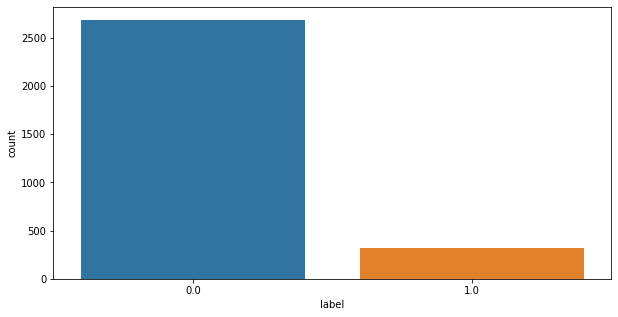

模型数据集中，1的数量为：316，0的数量为：2684 ，1所占比例为：10.53%


In [11]:
# 筛选出特征
new_variable = ['f_0208' ,'f_0209' ,'f_0211' ,'f_0216', 'f_0284' ,'f_0326' ,'f_0344', 'f_0998', 'f_1016', 'f_1772' ,'f_1796', 'f_1814', 'f_2778', 'f_2796', 'f_2922', 'label']
new_model_data1 = new_model_data1[new_variable]

## 查看样本标签分布
#创建子图及间隔设置
f,ax = plt.subplots(figsize=(10,5))
sns.countplot('label',data=new_model_data1)
plt.show()
num_1 = new_model_data1['label'].sum()
num_0 = new_model_data1['label'].count()-new_model_data1['label'].sum()
print('模型数据集中，1的数量为：%i，0的数量为：%i ，1所占比例为：%.2f%%' % (num_1,num_0,(num_1/new_model_data1['label'].count())*100))

# 样本标签不平衡，后面需要做平衡


In [12]:
# 特征处理
new_model_data1 = new_model_data1.fillna(new_model_data1.mean(0))
new_model_data1

,f_0208,f_0209,f_0211,f_0216,f_0284,f_0326,f_0344,f_0998,f_1016,f_1772,f_1796,f_1814,f_2778,f_2796,f_2922,label
0,0.381415,0,0.065432,0.307692,0.127011,0.281128,0.506235,0.432652,0.556563,0.509856,0.392002,0.829275,0.449951,0.655086,0.440266,0.0
1,0.381415,0,0.065432,0.296154,0.127011,0.281128,0.506235,0.432652,0.556563,0.509856,0.392002,0.829275,0.449951,0.655086,0.440266,0.0
2,0.381415,0,0.065432,0.287912,0.127011,0.281128,0.506235,0.432652,0.556563,0.509856,0.392002,0.829275,0.449951,0.655086,0.440266,0.0
3,0.600870,1,0.032099,0.276068,0.296229,1.000000,0.018029,0.231183,0.564394,0.497041,0.402089,0.853333,0.512903,0.636364,0.373749,1.0
4,0.589760,1,0.061728,0.284615,0.056457,0.257106,0.506010,0.274194,0.556818,0.510355,0.480418,0.830000,0.541935,0.655391,0.440609,0.0
5,0.589760,1,0.061728,0.286154,0.060571,0.239018,0.506010,0.236559,0.556818,0.510355,0.472585,0.830000,0.561290,0.655391,0.440609,0.0
6,0.589760,1,0.061728,0.289744,0.060571,0.239018,0.506010,0.236559,0.556818,0.510355,0.472585,0.830000,0.561290,0.655391,0.440609,0.0
7,0.589760,1,0.076640,0.302564,0.060571,0.239018,0.506010,0.236559,0.556818,0.510355,0.472585,0.830000,0.561290,0.655391,0.440609,0.0
8,0.625436,1,0.119753,0.407692,0.127011,0.281128,0.506235,0.432652,0.556563,0.509856,0.392002,0.829275,0.449951,0.655086,0.440266,0.0
9,0.625436,1,0.119753,0.453846,0.057600,0.127907,0.506010,0.478495,0.556818,0.510355,0.481723,0.830000,0.419355,0.655391,0.440609,0.0


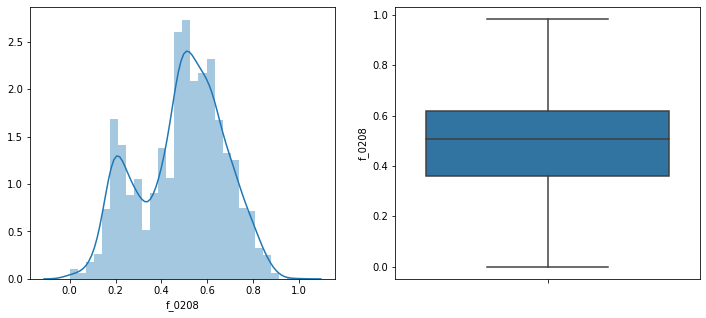

count    3000.000000
mean        0.487007
std         0.184050
min         0.000000
25%         0.360460
50%         0.507762
75%         0.619017
max         0.982070
Name: f_0208, dtype: float64


In [13]:
# 查看f_0208特征分布
f,[ax1,ax2]=plt.subplots(1,2,figsize=(12,5))
sns.distplot(new_model_data1['f_0208'],ax=ax1)
sns.boxplot(y='f_0208',data=new_model_data1,ax=ax2)
plt.show()
print(new_model_data1['f_0208'].describe())

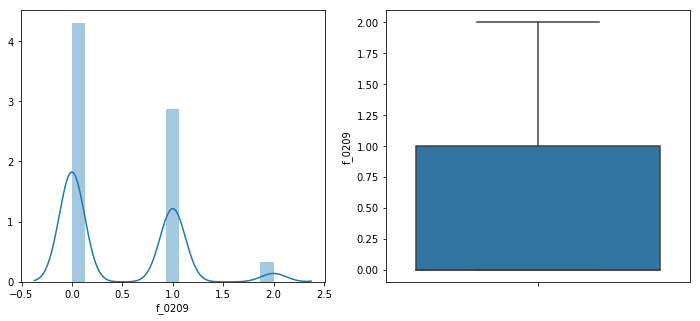

count    3000.000000
mean        0.470667
std         0.580734
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: f_0209, dtype: float64


In [21]:
# 查看f_0209特征分布
f,[ax1,ax2]=plt.subplots(1,2,figsize=(12,5))
sns.distplot(new_model_data1['f_0209'],ax=ax1)
sns.boxplot(y='f_0209',data=new_model_data1,ax=ax2)
plt.show()
print(new_model_data1['f_0209'].describe())

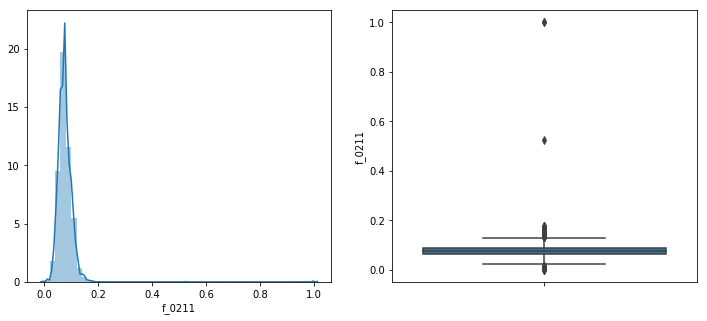

count    3000.000000
mean        0.076640
std         0.033826
min         0.000000
25%         0.061728
50%         0.075309
75%         0.088889
max         1.000000
Name: f_0211, dtype: float64


In [22]:
# 查看f_0211特征分布
f,[ax1,ax2]=plt.subplots(1,2,figsize=(12,5))
sns.distplot(new_model_data1['f_0211'],ax=ax1)
sns.boxplot(y='f_0211',data=new_model_data1,ax=ax2)
plt.show()
print(new_model_data1['f_0211'].describe())

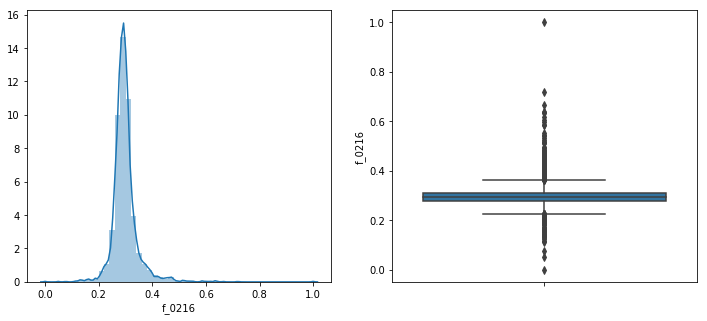

count    3000.000000
mean        0.297647
std         0.048945
min         0.000000
25%         0.276319
50%         0.292308
75%         0.310769
max         1.000000
Name: f_0216, dtype: float64


In [23]:
# 查看f_0216特征分布
f,[ax1,ax2]=plt.subplots(1,2,figsize=(12,5))
sns.distplot(new_model_data1['f_0216'],ax=ax1)
sns.boxplot(y='f_0216',data=new_model_data1,ax=ax2)
plt.show()
print(new_model_data1['f_0216'].describe())

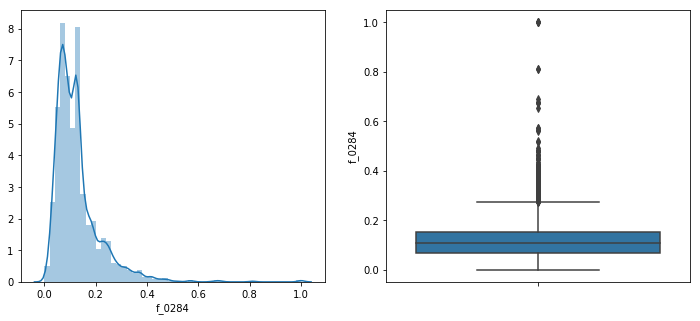

count    3000.000000
mean        0.127011
std         0.091523
min         0.000000
25%         0.068571
50%         0.107200
75%         0.150857
max         1.000000
Name: f_0284, dtype: float64


In [24]:
# 查看f_0284特征分布
f,[ax1,ax2]=plt.subplots(1,2,figsize=(12,5))
sns.distplot(new_model_data1['f_0284'],ax=ax1)
sns.boxplot(y='f_0284',data=new_model_data1,ax=ax2)
plt.show()
print(new_model_data1['f_0284'].describe())

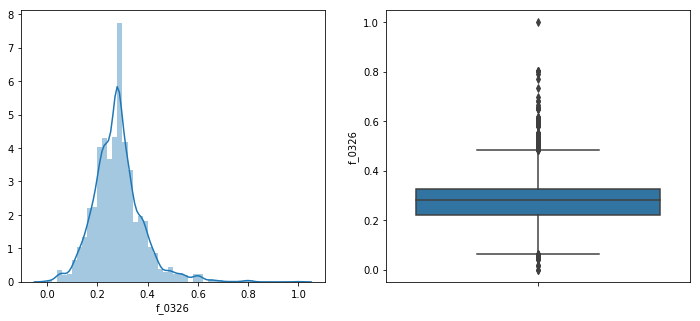

count    3000.000000
mean        0.281128
std         0.097672
min         0.000000
25%         0.220930
50%         0.281128
75%         0.326873
max         1.000000
Name: f_0326, dtype: float64


In [25]:
# 查看f_0326特征分布
f,[ax1,ax2]=plt.subplots(1,2,figsize=(12,5))
sns.distplot(new_model_data1['f_0326'],ax=ax1)
sns.boxplot(y='f_0326',data=new_model_data1,ax=ax2)
plt.show()
print(new_model_data1['f_0326'].describe())

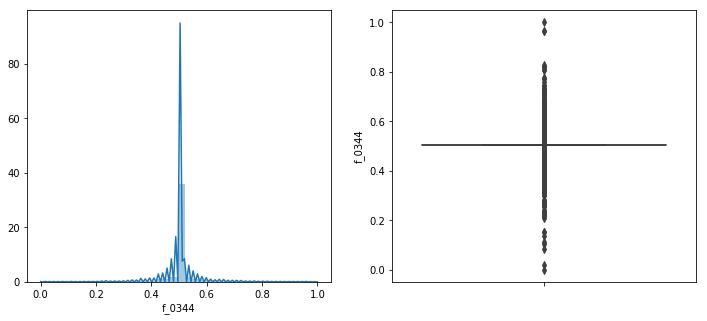

count    3000.000000
mean        0.506235
std         0.057650
min         0.000000
25%         0.506010
50%         0.506010
75%         0.506010
max         1.000000
Name: f_0344, dtype: float64


In [26]:
# 查看f_0344特征分布
f,[ax1,ax2]=plt.subplots(1,2,figsize=(12,5))
sns.distplot(new_model_data1['f_0344'],ax=ax1)
sns.boxplot(y='f_0344',data=new_model_data1,ax=ax2)
plt.show()
print(new_model_data1['f_0344'].describe())

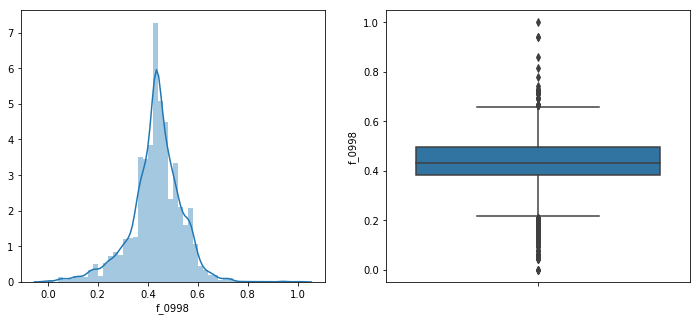

count    3000.000000
mean        0.432652
std         0.102834
min         0.000000
25%         0.381720
50%         0.432652
75%         0.494624
max         1.000000
Name: f_0998, dtype: float64


In [27]:
# 查看f_0998特征分布
f,[ax1,ax2]=plt.subplots(1,2,figsize=(12,5))
sns.distplot(new_model_data1['f_0998'],ax=ax1)
sns.boxplot(y='f_0998',data=new_model_data1,ax=ax2)
plt.show()
print(new_model_data1['f_0998'].describe())

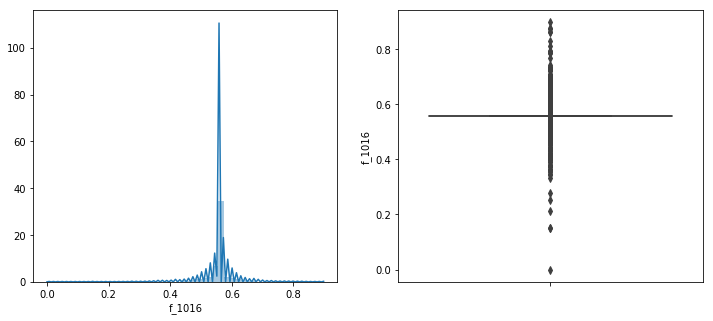

count    3000.000000
mean        0.556563
std         0.044194
min         0.000000
25%         0.556563
50%         0.556818
75%         0.556818
max         0.897727
Name: f_1016, dtype: float64


In [28]:
# 查看f_1016特征分布
f,[ax1,ax2]=plt.subplots(1,2,figsize=(12,5))
sns.distplot(new_model_data1['f_1016'],ax=ax1)
sns.boxplot(y='f_1016',data=new_model_data1,ax=ax2)
plt.show()
print(new_model_data1['f_1016'].describe())

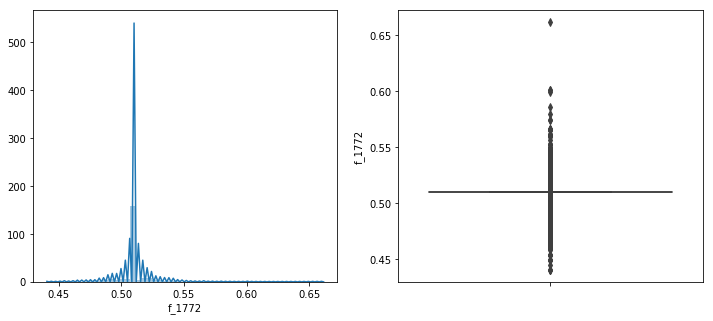

count    3000.000000
mean        0.509856
std         0.012914
min         0.440828
25%         0.509856
50%         0.510355
75%         0.510355
max         0.661243
Name: f_1772, dtype: float64


In [29]:
# 查看f_1772特征分布
f,[ax1,ax2]=plt.subplots(1,2,figsize=(12,5))
sns.distplot(new_model_data1['f_1772'],ax=ax1)
sns.boxplot(y='f_1772',data=new_model_data1,ax=ax2)
plt.show()
print(new_model_data1['f_1772'].describe())

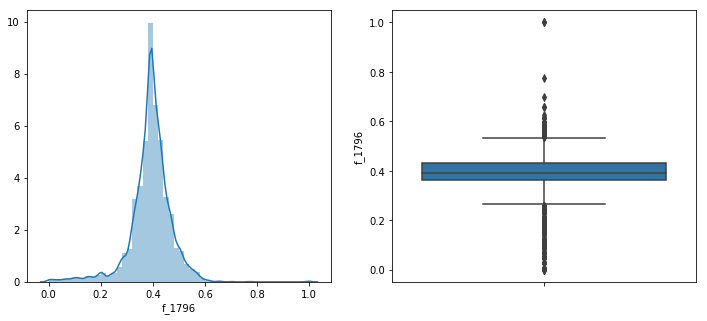

count    3000.000000
mean        0.392002
std         0.080105
min         0.001305
25%         0.362924
50%         0.392002
75%         0.430809
max         1.000000
Name: f_1796, dtype: float64


In [31]:
# 查看f_1796特征分布
f,[ax1,ax2]=plt.subplots(1,2,figsize=(12,5))
sns.distplot(new_model_data1['f_1796'],ax=ax1)
sns.boxplot(y='f_1796',data=new_model_data1,ax=ax2)
plt.show()
print(new_model_data1['f_1796'].describe())

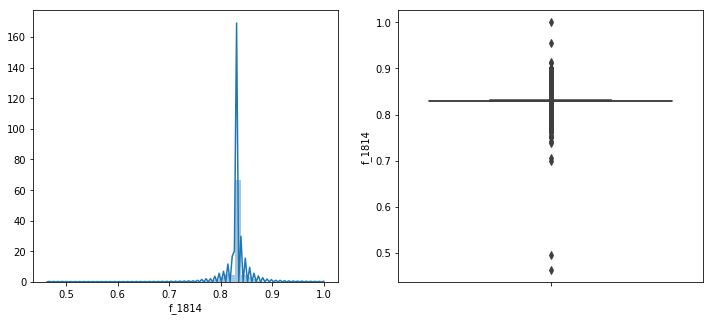

count    3000.000000
mean        0.829275
std         0.018079
min         0.463333
25%         0.829275
50%         0.830000
75%         0.830000
max         1.000000
Name: f_1814, dtype: float64


In [32]:
# 查看f_1814特征分布
f,[ax1,ax2]=plt.subplots(1,2,figsize=(12,5))
sns.distplot(new_model_data1['f_1814'],ax=ax1)
sns.boxplot(y='f_1814',data=new_model_data1,ax=ax2)
plt.show()
print(new_model_data1['f_1814'].describe())

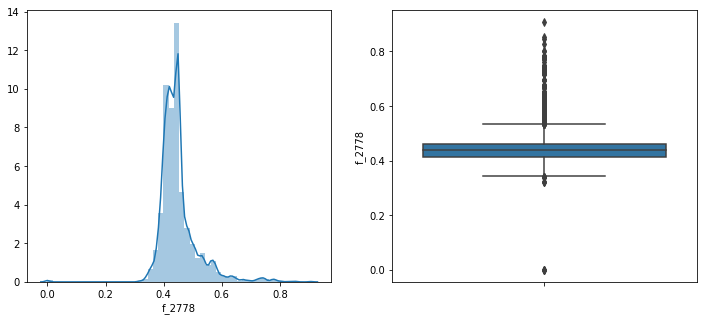

count    3000.000000
mean        0.449951
std         0.065937
min         0.000000
25%         0.412903
50%         0.438710
75%         0.461290
max         0.906452
Name: f_2778, dtype: float64


In [33]:
# 查看f_2778特征分布
f,[ax1,ax2]=plt.subplots(1,2,figsize=(12,5))
sns.distplot(new_model_data1['f_2778'],ax=ax1)
sns.boxplot(y='f_2778',data=new_model_data1,ax=ax2)
plt.show()
print(new_model_data1['f_2778'].describe())

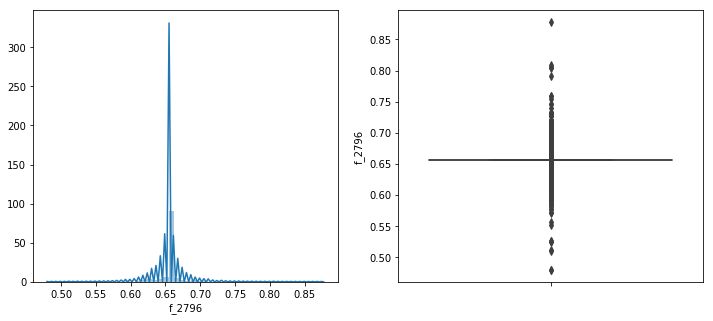

count    3000.000000
mean        0.655086
std         0.018882
min         0.479915
25%         0.655391
50%         0.655391
75%         0.655391
max         0.877378
Name: f_2796, dtype: float64


In [34]:
# 查看f_2796特征分布
f,[ax1,ax2]=plt.subplots(1,2,figsize=(12,5))
sns.distplot(new_model_data1['f_2796'],ax=ax1)
sns.boxplot(y='f_2796',data=new_model_data1,ax=ax2)
plt.show()
print(new_model_data1['f_2796'].describe())

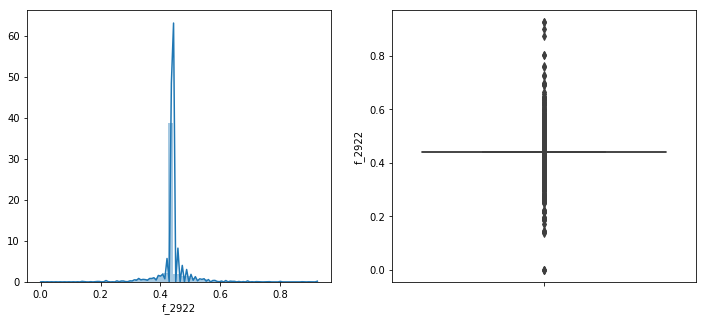

count    3000.000000
mean        0.440266
std         0.052440
min         0.000000
25%         0.440266
50%         0.440609
75%         0.440609
max         0.924293
Name: f_2922, dtype: float64


In [35]:
# 查看f_2922特征分布
f,[ax1,ax2]=plt.subplots(1,2,figsize=(12,5))
sns.distplot(new_model_data1['f_2922'],ax=ax1)
sns.boxplot(y='f_2922',data=new_model_data1,ax=ax2)
plt.show()
print(new_model_data1['f_2922'].describe())

In [14]:
## 拆分训练集和测试集
X = new_model_data1.drop('label',axis=1)
y = new_model_data1['label']

# 分割数据，25%用于测试集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=33)


C:\Users\HouYushan\PycharmProjects\mspy3.7\sklearnpy37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  del sys.path[0]


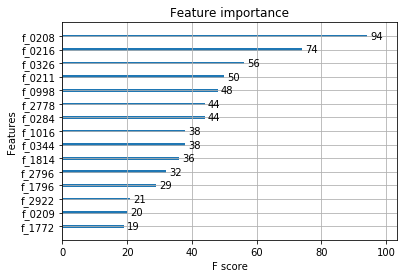

C:\Users\HouYushan\PycharmProjects\mspy3.7\sklearnpy37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HouYushan\PycharmProjects\mspy3.7\sklearnpy37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  del sys.path[0]


In [18]:
## 算法模型

from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# from xgboost import plot_importance
from sklearn.ensemble import RandomForestClassifier

# 算法函数
def ModelClassifier(model,X_train,y_train,X_test,outResultfile,outModelfile,p=True):
    model.fit(X_train,y_train)
#     y_pred = model.predict(X_test)
    y_pred = model.predict_proba(X_test)[:, 1] 
    Series(y_pred).to_csv(outResultfile)

    #保存model
    from sklearn.externals import joblib
    joblib.dump(model,outModelfile)
    clf = joblib.load(outModelfile)

    if p:
        #绘制特征的重要性
        plot_importance(model)
        pyplot.show()
    else:
        pass

# 1.随即深林模型
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=8)
outResultfile = 'rf.csv'
outModelfile = 'RandomForestModel.pkl'
ModelClassifier(model,X_train,y_train,X_test,outResultfile,outModelfile,p=False)

# 2.xgboost模型
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

model = XGBClassifier()
outResultfile = 'xgboost.csv'
outModelfile = 'xgboostModel.pkl'
ModelClassifier(model,X_train,y_train,X_test,outResultfile,outModelfile,p=True)


#### 3.logistic回归 ####
from sklearn import linear_model
model = linear_model.LogisticRegression(C=1000.0, random_state=0)  
outResultfile = 'lr.csv'
outModelfile = 'LogisticModel.pkl'
ModelClassifier(model,X_train,y_train,X_test,outResultfile,outModelfile,p=False)
#如果用正则化，可以添加参数penalty，可以是l1正则化（可以更有效的抵抗共线性），也可以是l2正则化，如果是类别不均衡的数据集，可以添加class_weight参数，这个可以自己设置，也可以让模型自己计算
# logistic = linear_model.LogisticRegression( penalty='l1', class_weight='balanced')






## 参数优化

print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.learning_curve import validation_curve

digits = load_digits()
X, y = digits.data, digits.target

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()
print('----end-----')

## 数据处理相关

history_df中存放了每个id，在不同time，对应的A, B的数值。

In [4]:
history_data = pd.read_csv('history_data.csv', parse_dates=['time'])
history_data


,id,time,A,B
0,1,2019-01-26 08:52:00,3.797676,8.432960
1,1,2019-01-29 14:59:00,NaN,4.157219
2,1,2019-01-13 00:01:00,6.516694,4.922487
3,1,2019-02-01 00:27:00,2.627256,NaN
4,1,2019-03-26 00:32:00,8.939391,NaN
5,2,2019-01-01 00:14:00,NaN,6.449302
6,2,2019-01-26 00:52:00,3.629338,1.529292
7,2,2019-02-04 00:05:00,4.299086,NaN
8,2,2019-02-28 00:51:00,NaN,3.140770
9,2,2019-03-01 00:44:00,6.353059,5.926424


sample_df存放了一些id和obs_time的组合。

In [5]:
sample_df = pd.read_csv('sample.csv')
sample_df

,id,obs_time
0,1,2019/3/7 0:00
1,1,2019/2/1 0:00
2,2,2019/3/15 0:00
3,2,2019/2/1 0:00


对sample_df中每个id和obs_time的组合，计算离obs_time过去10, 60天内， 该id对应的A, B的最大值, 非空记录数量。将结果存在不同的列中。

例如:


最终的结果包含的列:
* id
* obs_time
* 10天内A平均值
* 10天内A非空样本数量
* 60天内A平均值
* 60天内A非空样本数量
* 10天内B平均值
* 10天内B非空样本数量
* 60天内B平均值
* 60天内B非空样本数量

将计算结果存为excel保存

In [23]:
# 开发相应的代码

# newdf = history_data['time'].groupby(0<(pd.to_datetime(history_data['time']) - pd.to_datetime(sample_df['obs_time'])))
for i in pd.to_datetime(sample_df['obs_time']):
    newdf = (pd.to_datetime(history_data['time'])-i).astype('timedelta64[s]')
    history_data['time'].groupby(10*86400 >= newdf >=0)
#     if 10*86400 >= newdf >=0:
        

    print(newdf)



# import time

# for index,row in sample_df.iterrows():
#     D = []
#     LA = []
#     LB = []
#     TA = 0
#     TB = 0
#     ttime = row['obs_time'].replace('/','-')
#     newtime = ttime.replace('0:00','00:00:00')
#     timeArray = time.strptime(newtime, "%Y-%m-%d %H:%M:%S")
#     timesamp = time.mktime(timeArray)
#     timesamp10 = timesamp - 10 * 86400
#     print(timesamp,timesamp10)
#     for index,row in history_data.iterrows():
#         timeArray1 = time.strptime(str(row['time']),"%Y-%m-%d %H:%M:%S")
#         timesamp1 = time.mktime(timeArray1)
#         print(timesamp1)
#         if timesamp>= timesamp1 >= timesamp10:
#             A = row['A']
#             if A != 'NaN' and A != None:
#                 print('A:::::::::',A)
#                 LA.append(A)
#                 TA += 1
#             else:
#                 pass
#             B = row['B']
#             if B != 'NaN' and B != 'nan':
#                 LB.append(B)
#                 TB += 1
#             else:
#                 pass
# #     max_LA = max(LA)
# #     max_LB = max(LB)
#     max_LA = 3
#     max_LB = 4
#     print('-------------------------',LA,LB,TA,TB,max_LA,max_LB)
    
            
#     timesamp60 = timesamp - 60 * 86400
#     print(timesamp,timesamp60)
#     LA60 = []
#     LB60 = []
#     TA60 = 0
#     TB60 = 0
#     for index,row in history_data.iterrows():
#         timeArray1 = time.strptime(str(row['time']),"%Y-%m-%d %H:%M:%S")
#         timesamp1 = time.mktime(timeArray1)
#         print(timesamp1)
#         if timesamp>= timesamp1 >= timesamp60:
#             A = row['A']
#             if A != 'NaN' and A != None:
#                 print('A:::::::::',A)
#                 LA60.append(A)
#                 TA60 += 1
#             else:
#                 pass
#             B = row['B']
#             if B != 'NaN' and B != 'nan':
#                 LB60.append(B)
#                 TB60 += 1
#             else:
#                 pass
            
# #     max_LA60 = max(LA60)
# #     max_LB60 = max(LB60)
#     max_LA60 = 1
#     max_LB60 =2
              

#     D.append(row['id'])
#     D.append(row['obs_time'])
#     D.append(max_LA)
#     D.append(TA)
#     D.append(max_LB)
#     D.append(TB)
    
#     D.append(TA60)
#     D.append(max_LA60)
#     D.append(TB60)
#     D.append(max_LB60)
    
#     write_to_excel(D)
    
    
    
# # 数据写入excel
# def write_to_excel(data):

#     # 一个Workbook对象，这就相当于创建了一个Excel文件

#     book = xlwt.Workbook(encoding='utf-8', style_compression=0)

#     sheet = book.add_sheet(classfield, cell_overwrite_ok=True)

#     # 第一行(列标题)

#     sheet.write(0, 0, 'id')

#     sheet.write(0, 1, 'obs_time')

#     sheet.write(0, 2, '10天内A最大值')

#     sheet.write(0, 3, '10天内A非空样本数量')

#     sheet.write(0, 4, '60天内A最大值')

#     sheet.write(0, 5, '60天内A非空样本数量')

#     sheet.write(0, 6, '10天内B最大值')

#     sheet.write(0, 7, '10天内B非空样本数量')

#     sheet.write(0, 8, '60天内B最大值')

#     sheet.write(0, 9, '60天内B非空样本数量')

#     for i in range(len(data)):

# #         bounstr = ''

# #         bounlist = getBounById(data[i]['id'])

# #         print(poilist[i])

#         # 每一行写入

#         sheet.write(i + 1, i, data[i])

#     # 最后，将以上操作保存到指定的Excel文件中

#     book.save('1' + '.xls')




ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().